# Imports

In [1]:
import os
import sys
import json
import spotipy
import webbrowser
import spotipy.util as util
from json.decoder import JSONDecodeError
from collections import OrderedDict
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pickle
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot
import pylab
import patsy
%matplotlib inline
%config InlineBackend.figure_format='svg'
import scipy
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Lasso
import datetime as dt
from sklearn import datasets, linear_model

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Open pickle file

In [2]:
with open('final.pkl', 'rb') as handle:
    data = pickle.load(handle)
data.head()

,artist,plat_yes_no,followers,popularity,spotify_artist_id,albums
36,Drake,1,19729716,99,3TVXtAsR1Inumwj472S9r4,Take Care (Deluxe)
37,Drake,1,19729716,99,3TVXtAsR1Inumwj472S9r4,If You're Reading This It's Too Late
38,Drake,1,19729716,99,3TVXtAsR1Inumwj472S9r4,So Far Gone
39,Drake,1,19729716,99,3TVXtAsR1Inumwj472S9r4,What A Time To Be Alive
40,Drake,1,19729716,99,3TVXtAsR1Inumwj472S9r4,Views


# EDA 

## View Data

In [3]:
data.head()

,artist,plat_yes_no,followers,popularity,spotify_artist_id,albums
36,Drake,1,19729716,99,3TVXtAsR1Inumwj472S9r4,Take Care (Deluxe)
37,Drake,1,19729716,99,3TVXtAsR1Inumwj472S9r4,If You're Reading This It's Too Late
38,Drake,1,19729716,99,3TVXtAsR1Inumwj472S9r4,So Far Gone
39,Drake,1,19729716,99,3TVXtAsR1Inumwj472S9r4,What A Time To Be Alive
40,Drake,1,19729716,99,3TVXtAsR1Inumwj472S9r4,Views


In [4]:
data.shape

(792, 6)

## Create a dataframe without spotify_artist_id and albums

In [5]:
df = data.drop(columns=['spotify_artist_id','albums'])
df = df.drop_duplicates(subset=['artist'],keep='first')
df = df.rename(columns={'plat_yes_no':'platinum'})
df = df.sort_values(by=['popularity'],ascending=False)
df.head()

,artist,platinum,followers,popularity
253,Post Malone,1,3792488,100
36,Drake,1,19729716,99
110,Kendrick Lamar,1,8813295,94
625,Cardi B,1,2257130,93
65,J. Cole,1,5074440,93


In [6]:
df.shape

(53, 4)

## Pairplots and correlation matrixes

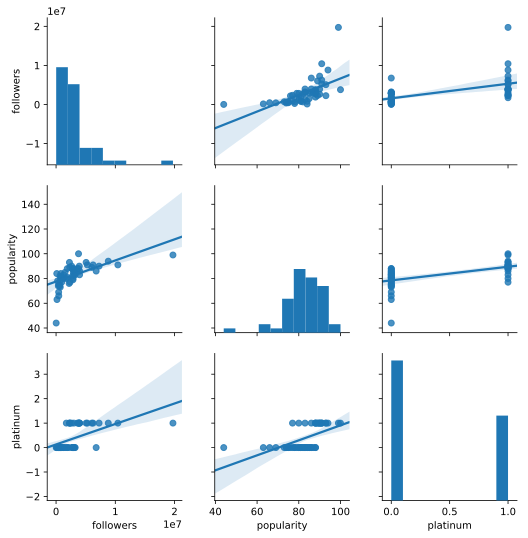

In [7]:
sns.pairplot(df, vars=['followers', 'popularity','platinum'], kind='reg');

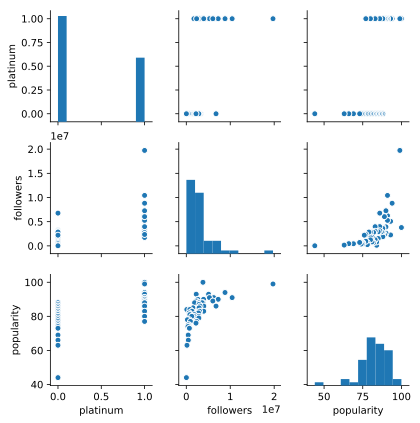

In [8]:
sns.pairplot(df, size = 2, aspect=1);

In [9]:
df.head()

,artist,platinum,followers,popularity
253,Post Malone,1,3792488,100
36,Drake,1,19729716,99
110,Kendrick Lamar,1,8813295,94
625,Cardi B,1,2257130,93
65,J. Cole,1,5074440,93


## Pairplots and correlation matrixes Part 2

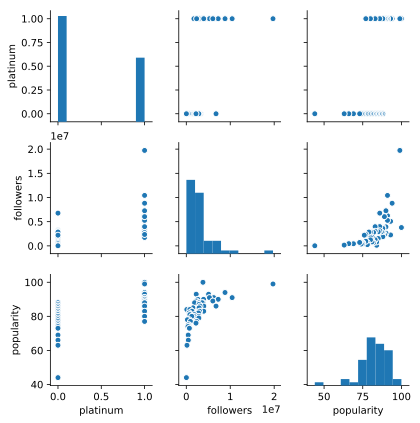

In [10]:
sns.pairplot(df, size = 2, aspect=1);

In [11]:
df.corr()

,platinum,followers,popularity
platinum,1.000000,0.559126,0.581252
followers,0.559126,1.000000,0.600666
popularity,0.581252,0.600666,1.000000


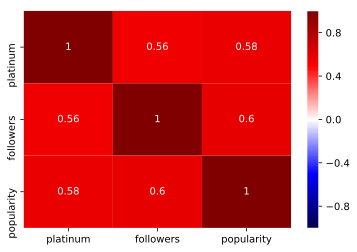

In [12]:
sns.heatmap(df.corr(), cmap='seismic',vmin=-1,vmax=1, annot=True);

# OLS and Linear Regression

In [13]:
df.head()

,artist,platinum,followers,popularity
253,Post Malone,1,3792488,100
36,Drake,1,19729716,99
110,Kendrick Lamar,1,8813295,94
625,Cardi B,1,2257130,93
65,J. Cole,1,5074440,93


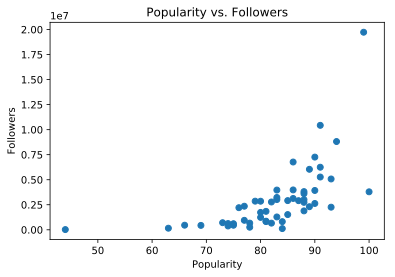

In [14]:
x = df.followers
y = df.popularity
plt.title("Popularity vs. Followers")
plt.xlabel("Popularity")
plt.ylabel("Followers")
matplotlib.pyplot.scatter(y,x)
matplotlib.pyplot.show()

In [15]:
y, X = patsy.dmatrices('platinum ~ popularity + followers', data=df, return_type="dataframe")

# Create model
model_1 = sm.OLS(y,X)
# This model fits the whole model to my as my training set
fit_1 = model_1.fit()
# Print summary statistics of the model's performance
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               platinum   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     17.15
Date:                Wed, 09 May 2018   Prob (F-statistic):           2.13e-06
Time:                        21:08:29   Log-Likelihood:                -22.982
No. Observations:                  53   AIC:                             51.96
Df Residuals:                      50   BIC:                             57.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4440      0.562     -2.569      0.013      -2.573      -0.315
popularity     0.0203      0.007      2.818      0.007       0.006       0.035
followers   4.922e-08   2.04e-08      2.411      0.020    8.22e-09    9.02e-08
==============================================================================
Omnibus:                       11.021   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.965
Skew:                           0.362   Prob(JB):                        0.138
Kurtosis:                       1.872   Cond. No.                     4.69e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
new_df = df.drop(columns=['artist'])
X = new_df.followers
y = new_df.popularity
new_df.head()

,platinum,followers,popularity
253,1,3792488,100
36,1,19729716,99
110,1,8813295,94
625,1,2257130,93
65,1,5074440,93


In [17]:
lr1 = LinearRegression()

X = new_df.iloc[:,1:9]
# All variables in the data set will be the response variables
y = new_df.iloc[:,0]
# Fit the model to the full dataset
lr1.fit(X,y)
# Print out the R^2 for the model against the full dataset
lr1.score(X,y)

0.4068381421890226

In [18]:
# intercept of the linear regression
print(lr1.intercept_)
# coefficients of each variable in the linear regression
lr1.coef_

-1.4439746067827786


array([4.92169762e-08, 2.02590287e-02])

# Train/Validate/Test

In [19]:
df.head()

,artist,platinum,followers,popularity
253,Post Malone,1,3792488,100
36,Drake,1,19729716,99
110,Kendrick Lamar,1,8813295,94
625,Cardi B,1,2257130,93
65,J. Cole,1,5074440,93


In [20]:
len(df)

53

In [21]:
X = df.drop(['artist','platinum'],axis=1)
y = df['platinum']

In [22]:
X.head()

,followers,popularity
253,3792488,100
36,19729716,99
110,8813295,94
625,2257130,93
65,5074440,93


In [23]:
y.head()

253    1
36     1
110    1
625    1
65     1
Name: platinum, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42, 2) (42,)
(11, 2) (11,)


In [25]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions

array([-0.38884582,  0.8093939 ,  0.62505581, -1.01735567,  0.35170732,
        0.51036277, -0.0451691 ,  0.24963841,  0.31943742,  0.69642591,
        0.56574528])

In [26]:
model.coef_

array([2.70057360e-08, 3.28852435e-02])

Text(0,0.5,'Predictions')

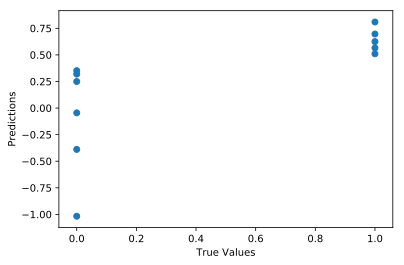

In [27]:
plt.scatter(y_test, predictions);
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [28]:
model.score(X_test, y_test)

0.20297506479701447

# Regularize

In [29]:
# 10-fold cross-validation
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=10, scoring='mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[0.39595007 0.18056199 0.24926013 0.25925955 0.15092687 0.15005793
 0.16929793 0.15203298 0.0204499  0.56490271]


/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

In [30]:
df.head()

,artist,platinum,followers,popularity
253,Post Malone,1,3792488,100
36,Drake,1,19729716,99
110,Kendrick Lamar,1,8813295,94
625,Cardi B,1,2257130,93
65,J. Cole,1,5074440,93


In [31]:
X2 = df.drop(['artist','platinum'],axis=1)
y2 = df['platinum']

In [32]:
# cross validation test

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(42, 2) (42,)
(11, 2) (11,)


In [33]:
lm = linear_model.LinearRegression()
model2 = lm.fit(X_train2, y_train2)
predictions2 = lm.predict(X_test2)
predictions2

array([ 0.26040668,  0.41300629, -0.07362855,  0.31173078, -0.15195761,
        0.66452246,  0.34150344,  0.69124377,  0.37975441,  0.28850588,
        0.2853651 ])

Text(0,0.5,'Predictions')

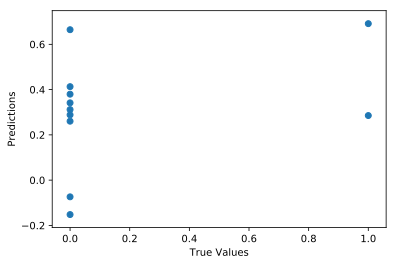

In [34]:
plt.scatter(y_test2, predictions2)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [35]:
model2.score(X_test2, y_test2)

-0.07297140115854006

In [36]:
model2.coef_ 

array([5.02304794e-08, 2.10644553e-02])

## Elastic Net

### Find alpha

In [37]:
# import pandas as pd
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# import numpy as np
# from sklearn.metrics import mean_squared_error as MSE
# from sklearn.linear_model import lasso_path, enet_path
# from sklearn.linear_model import Lasso

# X = df.drop(['artist','platinum'],axis=1)
# y = df['platinum']
# X.shape
# kf = KFold(n_splits=5,shuffle=True)



# alphas = [0,.001,.01,.1,.2,.5,.9,1,5,10,50,100,1000,10000]
# errors = []
# for i in alphas:
#     err_list = []
#     for train_index, test_index in kf.split(X):
#         #print("TRAIN:", train_index, "TEST:", test_index)
        ## fix the loc part below
#         X_train, X_test = X.loc[train_index], X.loc[test_index]
#         y_train, y_test = y[train_index], y[test_index]
        
#         lf = Lasso(i)
#         lf.fit(X_train,y_train)
#         #print(lf.coef_)
#         preds = lf.predict(X_test)
#         error = np.sqrt(MSE(preds,y_test))
#         err_list.append(error)
        
#     error = np.mean(err_list)
#     errors.append(error)
#     print("The RMSE for alpha = {0} is {1}".format(i,error))

In [38]:
alpha = 1e-9
enet = ElasticNet(alpha=alpha)
y_pred_enet = enet.fit(X_test2, y_test2)
y_pred_enet.score(X_test2,y_test2)

0.1205835902782405

In [39]:
model2.coef_

array([5.02304794e-08, 2.10644553e-02])

In [40]:
y_test2.head()

291    0
386    0
696    0
713    0
608    0
Name: platinum, dtype: int64

In [41]:
preds = model.predict(X_test2)
rmse = np.sqrt(MSE(y_test2, predictions2))
rmse

0.39951918644494916

In [42]:
r2_training = model2.score(X_train2, y_train2)
r2_training

0.4484268621869244

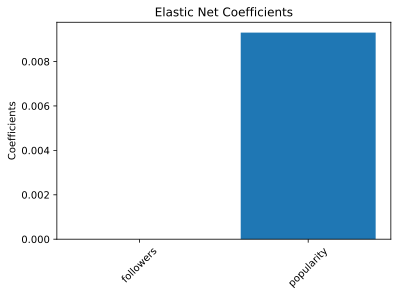

<Figure size 432x288 with 0 Axes>

In [43]:
# graphs coefficients of lassos

lasso = Lasso(alpha=1e-5)
lasso_coef = lasso.fit(X_test2, y_test2).coef_
_ = plt.bar(range(len(X_test2.columns)), lasso_coef)
_ = plt.xticks(range(len(X_test2.columns)), X_test2.columns, rotation=45)
_ = plt.ylabel('Coefficients')
_ = plt.title('Elastic Net Coefficients')
plt.show()
lasso.score(X_test2,y_test2)
plt.savefig('coefficients.png')

In [44]:
model.coef_

array([2.70057360e-08, 3.28852435e-02])

# Normalizing, scaling, and poly fitting features

In [45]:
df.head()

,artist,platinum,followers,popularity
253,Post Malone,1,3792488,100
36,Drake,1,19729716,99
110,Kendrick Lamar,1,8813295,94
625,Cardi B,1,2257130,93
65,J. Cole,1,5074440,93


## Check which features to normalize or scale

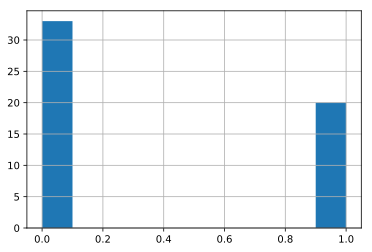

In [46]:
df.platinum.hist();

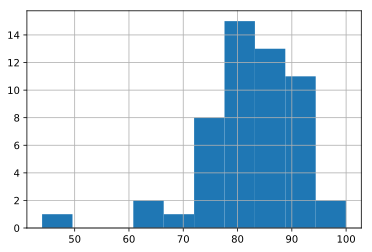

In [47]:
df.popularity.hist();

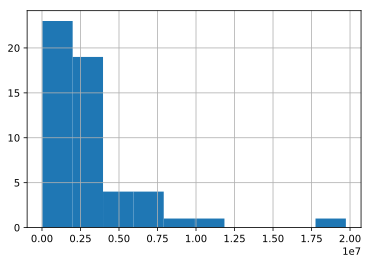

In [48]:
df.followers.hist();

### Normalize popularity (possibly reverse)

In [49]:
# x = df['popularity'].values # returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler() # normalizes all values between 0 and 1
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled # how should I fix this?? Ask Yi
# # rating_df = pd.DataFrame(x_scaled)
# # rating_df

### Scale followers (possibly reverse)

In [50]:
# scaler = StandardScaler()
# df1 = df.rename(columns=['artist'])
# scaler.fit(df1) # Do I need a 2-D array? Ask Yi
# # StandardScaler(copy=True, with_mean=True, with_std=True)
# # scaler.mean_
# # scaler.transform(data)

## Log popularity (based on the pairplot below)

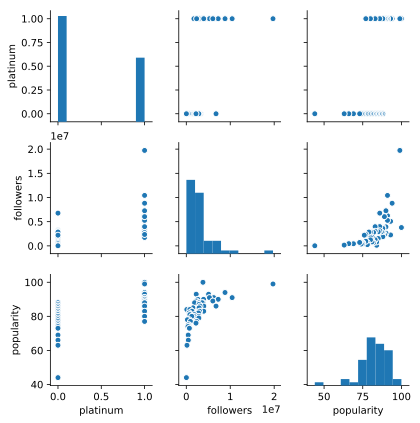

In [51]:
sns.pairplot(df, size = 2, aspect=1);

In [52]:
df['popularity_log']=np.log(df.popularity)

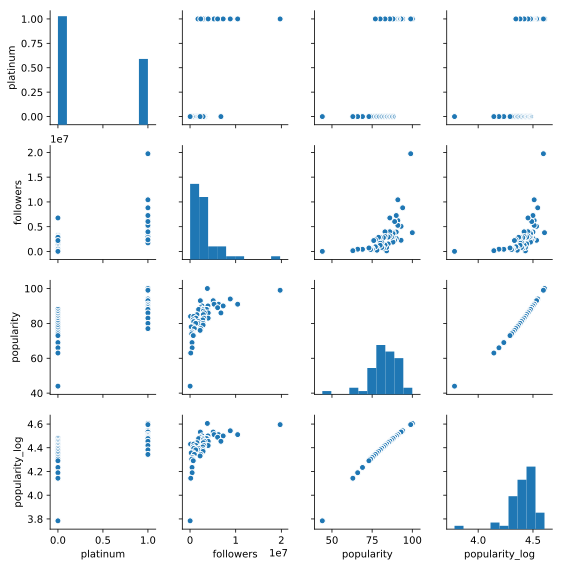

In [53]:
sns.pairplot(df, size = 2, aspect=1);

In [63]:
df['followers_log']=np.log(df.followers)

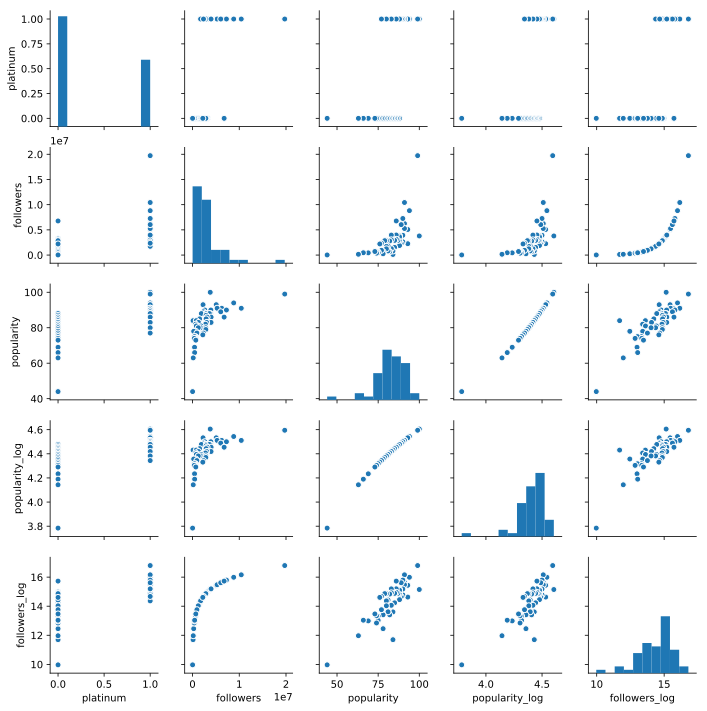

In [64]:
sns.pairplot(df, size = 2, aspect=1);

In [65]:
final = df.to_pickle('pipeline.pkl')